<a href="https://colab.research.google.com/github/hardiksng/linear_regression/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model




In [ ]:

df = pd.read_csv("/content/honeyproduction.csv")
print(df.head(10))

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   
5    FL  230000.0           98  22540000.0   4508000.0        0.64   
6    GA   75000.0           56   4200000.0    307000.0        0.69   
7    HI    8000.0          118    944000.0     66000.0        0.77   
8    ID  120000.0           50   6000000.0   2220000.0        0.65   
9    IL    9000.0           71    639000.0    204000.0        1.19   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
5  14426000.0  1998  
6   2898000.0  1998  
7    727000.0  1998  
8   3900000.0  1998  
9    7600

In [ ]:
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [ ]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


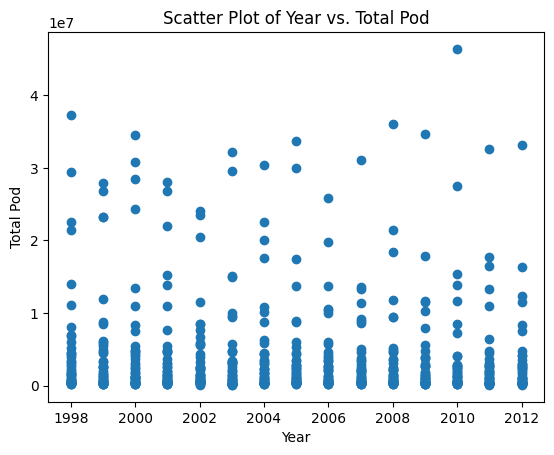

In [ ]:


# Import necessary libraries
import matplotlib.pyplot as plt
x = df.year.values.reshape(-1, 1)
# Create scatter plot
plt.scatter(x=x, y="totalprod", data=df)

# Label the axes
plt.xlabel("Year")
plt.ylabel("Total Pod")

# Add a title
plt.title("Scatter Plot of Year vs. Total Pod")

# Show the plot
plt.show()

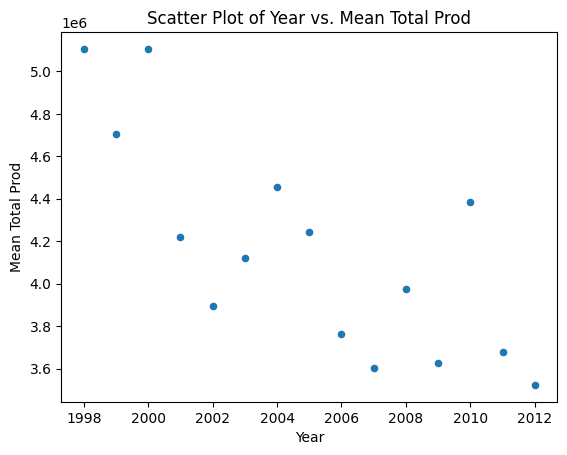

In [ ]:
# Calculate the mean of total prod for each year
df_grouped = df.groupby("year")["totalprod"].mean().reset_index()

# Create a scatter plot of year vs. mean total prod
df_grouped.plot.scatter(x="year", y="totalprod")

# Label the axes
plt.xlabel("Year")
plt.ylabel("Mean Total Prod")

# Add a title
plt.title("Scatter Plot of Year vs. Mean Total Prod")

# Show the plot
plt.show()

In [ ]:
prod_per_year = df['totalprod'].groupby(df['year']).mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [ ]:
X = prod_per_year['year']
print(X)
print(type(X))

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
print(X.values,type(X.values))
X = X.values.reshape(-1, 1)
y  = prod_per_year['totalprod']
print(y,type(y))

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012] <class 'numpy.ndarray'>
0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64 <class 'pandas.core.series.Series'>


In [ ]:
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

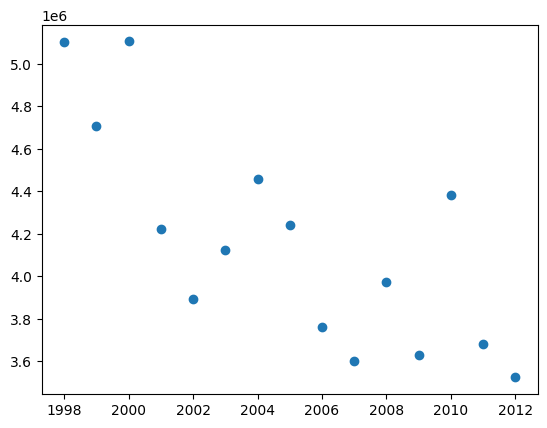

In [ ]:
plt.scatter(X,y)
plt.show()
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X,y)
print("m: ",regr.coef_[0])
print("b: ",regr.intercept_)

m:  -88303.18915238192
b:  181208083.10732976


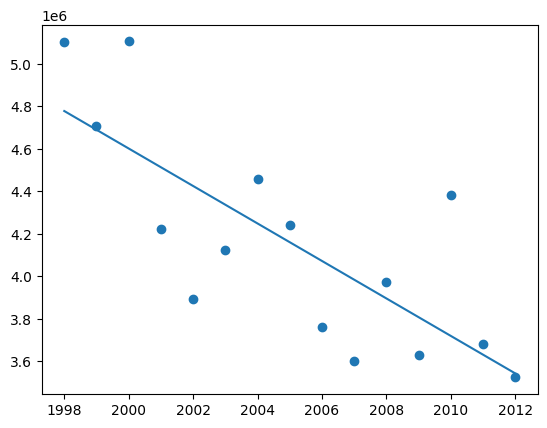

In [ ]:
y_predict = regr.predict(X)
plt.scatter(X,y)
plt.plot(X, y_predict)
plt.show()

In [ ]:
x_new = np.array(range(2025,2031)).reshape(-1,1)
y_new = regr.predict(x_new)

In [ ]:
y_new

array([2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445])

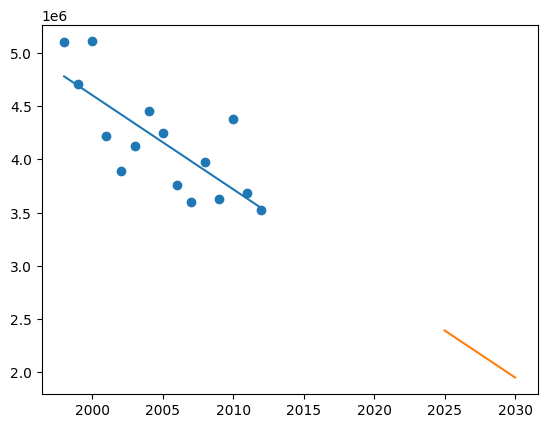

In [ ]:
y_predict = regr.predict(X)
plt.scatter(X,y)
plt.plot(X, y_predict)
plt.plot(x_new,y_new)
plt.show()